## bank data term policy analysis ( Classification - LogisticRegression )

In [1]:
# importing nessacry libraries

import pandas as pd
import numpy as np

In [2]:
# loading the dataset 

df = pd.read_csv("bank-full.csv",sep=";") 
print("Shape:", df.shape)

Shape: (45211, 17)


In [3]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
# data types
print("\nDtypes:\n", df.dtypes)



Dtypes:
 age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object


In [5]:
# missing values
print("\nMissing values per column:\n", df.isna().sum())



Missing values per column:
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [6]:
# basic stats for numeric columns
print("\nNumeric summary:\n", df.describe())



Numeric summary:
                 age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%     

In [7]:
# basic info for categorical columns
print("\nCategorical value counts (top 5 for each):")
for col in df.select_dtypes(include='object').columns:
    print(f"\n{col} value counts:")
    print(df[col].value_counts().head())


Categorical value counts (top 5 for each):

job value counts:
job
blue-collar    9732
management     9458
technician     7597
admin.         5171
services       4154
Name: count, dtype: int64

marital value counts:
marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64

education value counts:
education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

default value counts:
default
no     44396
yes      815
Name: count, dtype: int64

housing value counts:
housing
yes    25130
no     20081
Name: count, dtype: int64

loan value counts:
loan
no     37967
yes     7244
Name: count, dtype: int64

contact value counts:
contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64

month value counts:
month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
Name: count, dtype: int64

poutcome value counts:
poutcome
unknown    36959
failure     4901
other       1840


y
no     0.883015
yes    0.116985
Name: proportion, dtype: float64


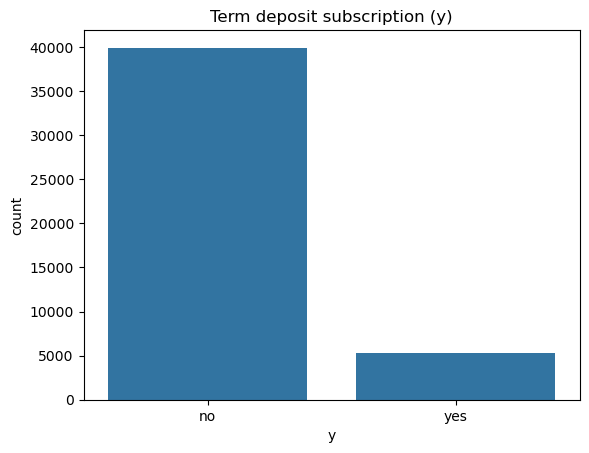

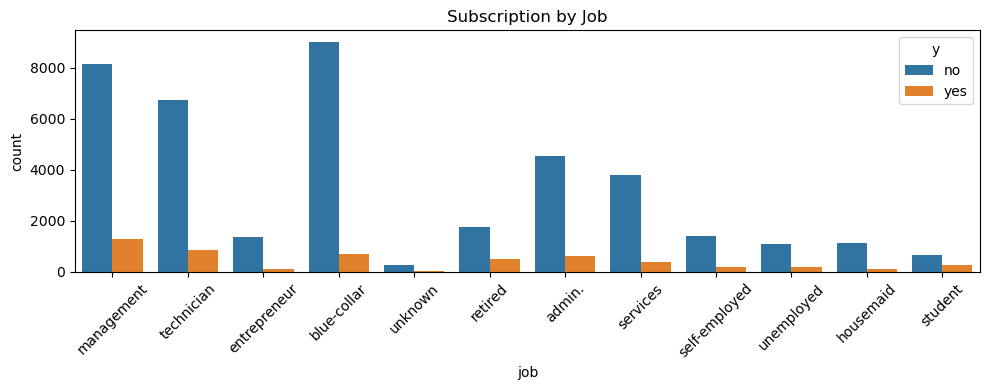

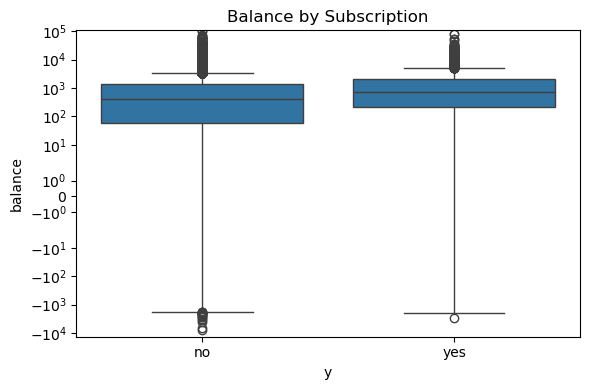

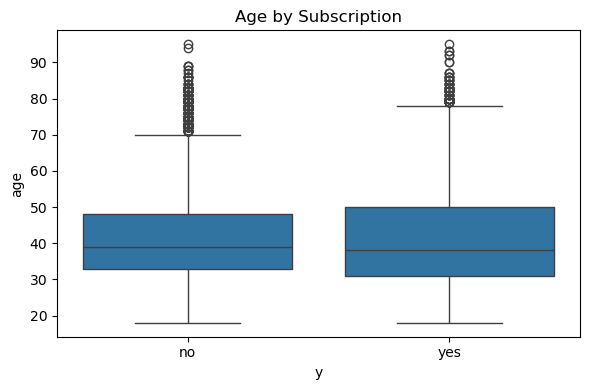

In [8]:
# EDA

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Target distribution
print(df['y'].value_counts(normalize=True))

sns.countplot(data=df, x='y')
plt.title('Term deposit subscription (y)')
plt.show()

# 2. y vs job
plt.figure(figsize=(10,4))
sns.countplot(data=df, x='job', hue='y')
plt.xticks(rotation=45)
plt.title('Subscription by Job')
plt.tight_layout()
plt.show()

# 3. y vs balance (boxplot)
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='y', y='balance')
plt.yscale('symlog')  # balances often have long tails
plt.title('Balance by Subscription')
plt.tight_layout()
plt.show()

# 4. y vs age (boxplot)
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='y', y='age')
plt.title('Age by Subscription')
plt.tight_layout()
plt.show()


In [9]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
le=LabelEncoder()

In [12]:
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])


In [13]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


In [14]:
X = df.drop('y',axis = 1)
y = df['y']

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
model = LogisticRegression()

In [21]:
model.fit(X_train,y_train)

LogisticRegression()

In [22]:
y_pred = model.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
accuracy_score(y_test,y_pred)

0.8900766735476261